# Average Variability Notebook

### Objectives

- Show Average of all images belonging to each label
- Show Average variability of all images belonging to each label
- Save images

### Inputs

- Image shape embeddings (outputs/{version}/image_shape.pkl)
- Training Images (inputs/brain_tumour_datas/train)

### Outputs

- outputs/{version}/avg_var_glioma.png
- outputs/{version}/avg_var_healthy.png
- outputs/{version}/avg_var_meningioma.png
- outputs/{version}/avg_var_pituitary.png

### Install Requirements

In [ ]:
%pip install -r /workspace/Brain_tumour_diagnostic/requirements.txt

### Import Packages

In [16]:
import joblib
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from tensorflow.keras.preprocessing import image


### Change Working Directory

In [3]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
work_dir = os.getcwd()
work_dir

'/workspace/Brain_tumour_diagnostic'

### Set Output Directory

In [4]:
version = 'v1'

In [19]:
my_data_dir = 'inputs/brain_tumour_dataset'
train_path = my_data_dir + '/train'

file_path = f'outputs/{version}'


### Load Images

In [9]:
def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            # n_images_per_label: we set a limit, since it may take too much time
            if counter < n_images_per_label:

                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y


In [10]:
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(224, 222, 3)

In [11]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(120, 224, 222, 3) (120,)


### Show Mean and Variability of Images

In [17]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    The pseudo-code for the function is:
    * Loop over all labels
    * Subset an array for a given label
    * Calculate the mean and standard deviation
    * Create a figure displaying the mean and variability of images
    * Save the image
    """

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")


==== Label glioma ====
Image Shape: (224, 222, 3)
==== Label healthy ====
Image Shape: (224, 222, 3)
==== Label meningioma ====
Image Shape: (224, 222, 3)
==== Label pituitary ====
Image Shape: (224, 222, 3)


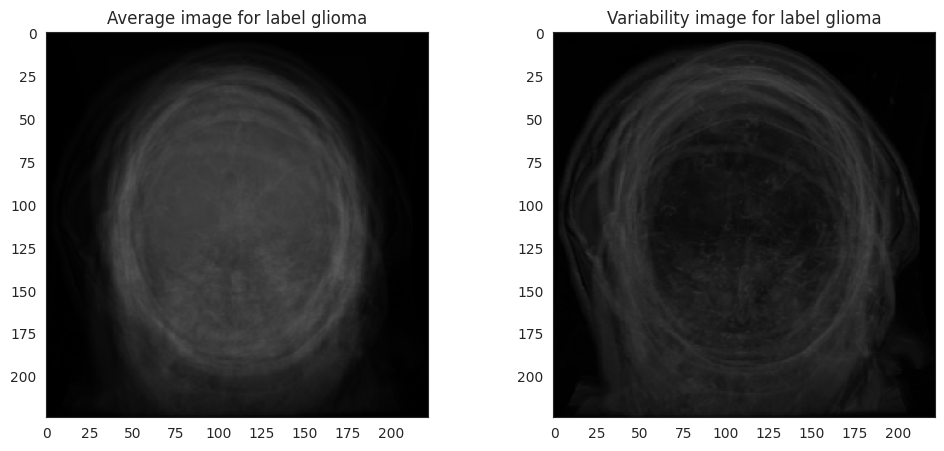

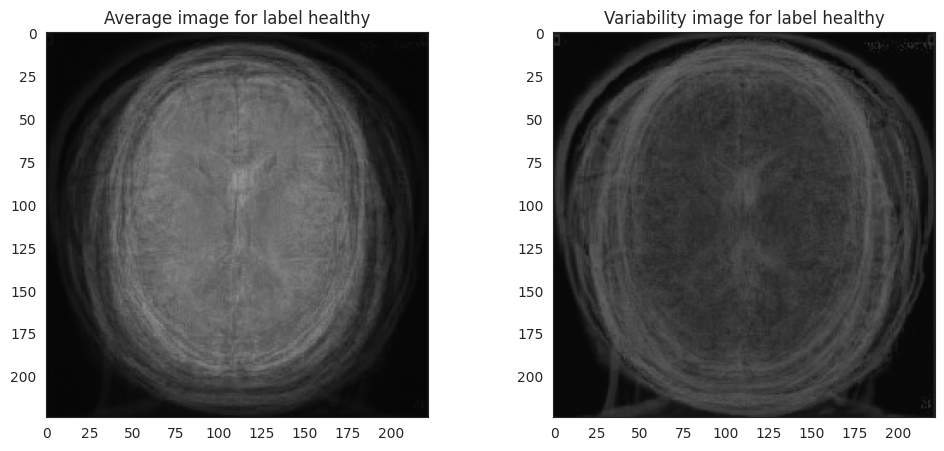

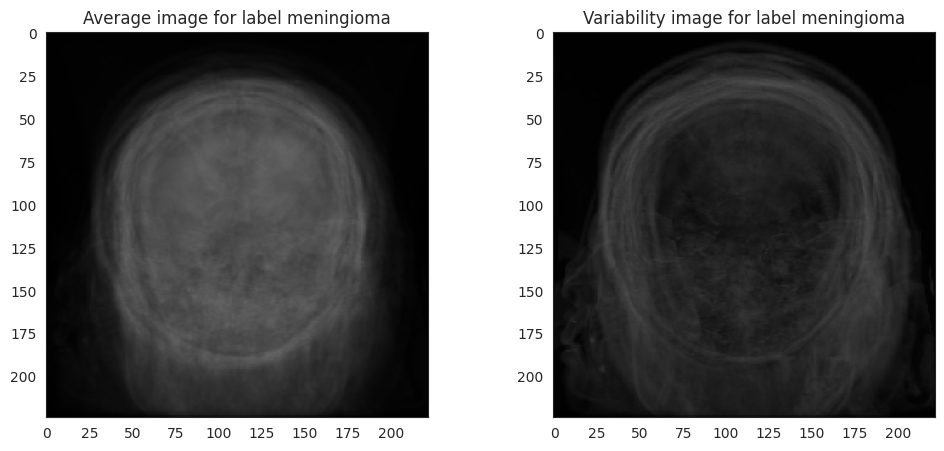

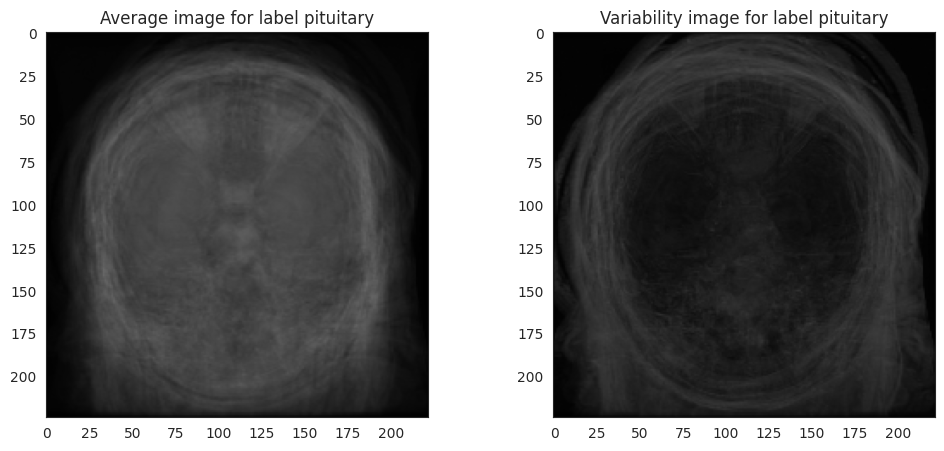

In [20]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)
